# SKLearn Clustering Examples

In [1]:
import random
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(cmap.N)]

mpl.rcParams["font.size"] = 24
mpl.rcParams["lines.linewidth"] = 2

seed = 0
random.seed(seed)
np.random.seed(seed)
n_samples = 10
markersize = 100

## Sample data points

In [2]:
# Sample 10 points
m1 = [1, 1]
cov1 = [[1, 0], [0, 1]]
s1 = np.random.multivariate_normal(m1, cov1, 5)

m2 = [-1, -1]
cov2 = [[1, -0.5], [-0.5, 1]]
s2 = np.random.multivariate_normal(m2, cov2, 5)

samples = np.concat([s1, s2])
np.random.shuffle(samples)

(np.float64(-2.659691942232599),
 np.float64(3.1307603678824707),
 np.float64(-1.3757641112226862),
 np.float64(3.4607340235073694))

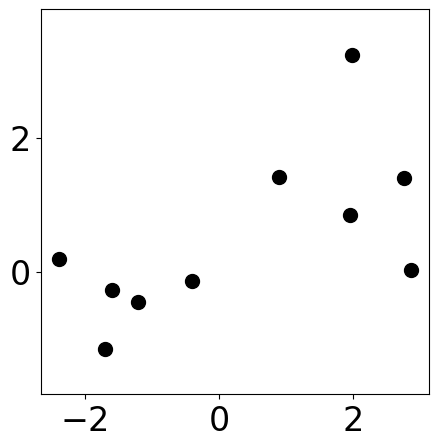

In [3]:
plt.figure(figsize=(5, 5))
plt.scatter(samples[:, 0], samples[:, 1], s=markersize, color="k")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.axis("equal")

## KMeans from sklearn

The clustering results may be different from the choice of initial centers. Here we specify the initial centers the same as what we used in the lecture slides.

In [4]:
from sklearn.cluster import k_means
centroid, labels, inertia = k_means(samples, n_clusters=2,
       init=samples[[0, 2], :])
print(labels)

[0 1 0 0 1 1 1 0 1 0]


(np.float64(-2.659691942232599),
 np.float64(3.1307603678824707),
 np.float64(-1.3757641112226862),
 np.float64(3.4607340235073694))

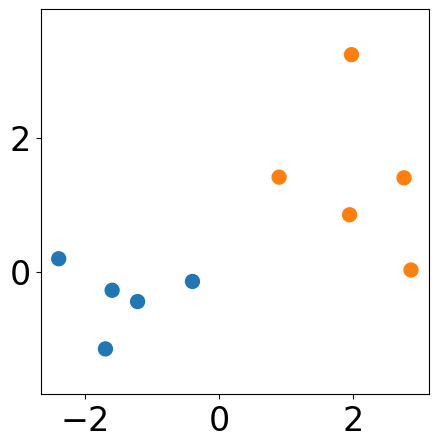

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(samples[:, 0], samples[:, 1],
            s=markersize, color=[colors[l] for l in labels])

plt.axis("equal")

## DBSCAN from sklearn

[ 0 -1  0  0  1  1  1  0  1  0]


(np.float64(-2.659691942232599),
 np.float64(3.1307603678824707),
 np.float64(-1.3757641112226862),
 np.float64(3.4607340235073694))

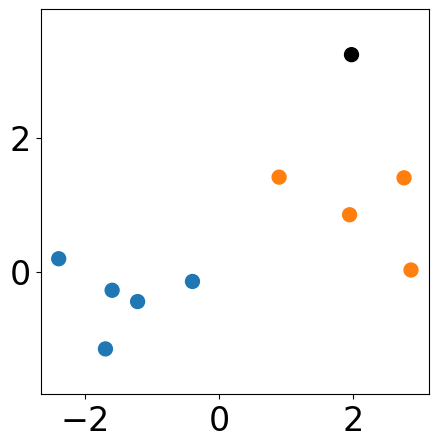

In [6]:
from sklearn.cluster import DBSCAN

eps = 2.0
min_samples = 3
dbscan = DBSCAN(eps=eps, min_samples=min_samples, \
    metric="euclidean", algorithm="auto")
dbscan.fit(samples)
print(dbscan.labels_)

plt.figure(figsize=(5, 5))
plt.scatter(samples[:, 0], samples[:, 1],
            s=markersize, color=[colors[l] if l>=0 else "k" for l in dbscan.labels_])
# plt.axis("off")
plt.axis("equal")